<a href="https://colab.research.google.com/github/Chrisolande/Computer-Vision-Projects/blob/main/Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import torch.nn as nn
import matplotlib.pyplot as plt
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [22]:
weight = 0.3
bias = 0.9

X = torch.arange(0,1,0.01).unsqueeze(dim = 1)
y = weight * X + bias


In [23]:
# Train-Test Split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [24]:
def plot_predictions(train_data =X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize = (10, 7))
  plt.scatter(train_data, train_labels, c = 'b', s = 4, label = "Training Data")
  plt.scatter(test_data, test_labels, c = 'g', s = 4, label = "Testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c = 'r', s = 4, label = "Prediction")

  plt.legend(prop = {'size': 14})

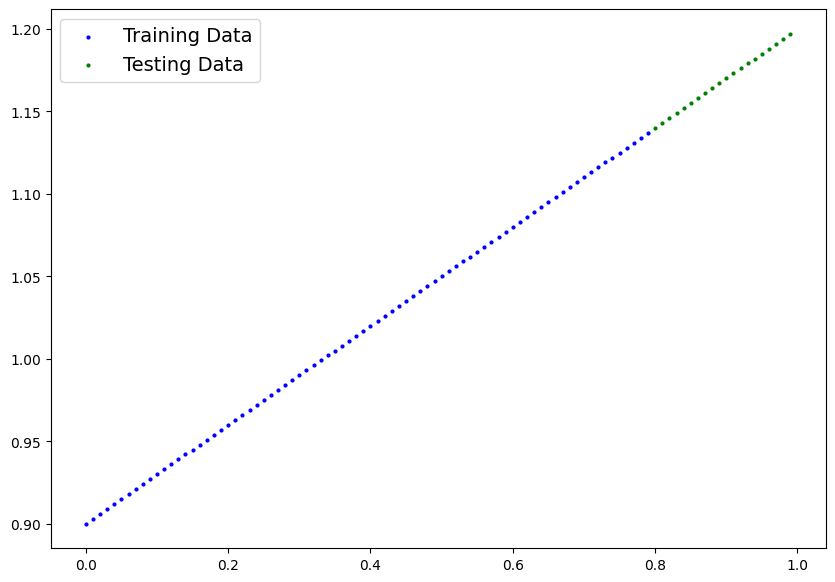

In [25]:
plot_predictions()

# Pytorch Model

In [26]:
# Create a linear Regression model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))
  def forward(self, x:torch.Tensor) ->torch.Tensor:
    return self.weight * x + self.bias


In [27]:
torch.manual_seed(42)

model_1 = LinearRegressionModel()
print(*model_1.parameters())

Parameter containing:
tensor([0.3367], requires_grad=True) Parameter containing:
tensor([0.1288], requires_grad=True)


# Predictions

In [28]:
with torch.inference_mode():
  y_preds = model_1(X_test)

  # Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds[:10]}")

Number of testing samples: 20
Number of predictions made: 20
Predicted values:
tensor([[0.3982],
        [0.4015],
        [0.4049],
        [0.4083],
        [0.4116],
        [0.4150],
        [0.4184],
        [0.4217],
        [0.4251],
        [0.4285]])


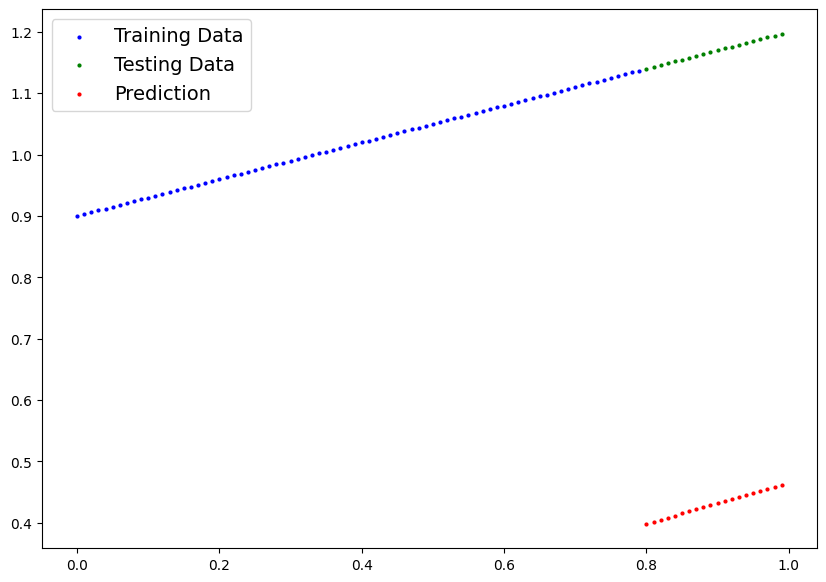

In [29]:
plot_predictions(predictions = y_preds)

In [30]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

# Optimization Loop

In [31]:
torch.manual_seed(42)
epochs = 300
train_loss_values = []
test_loss_values = []
epoch_count = []
for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

  if epoch % 20 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.7566978335380554 | MAE Test Loss: 0.7248174548149109 
Epoch: 20 | MAE Train Loss: 0.5254928469657898 | MAE Test Loss: 0.4541124403476715 
Epoch: 40 | MAE Train Loss: 0.2942880392074585 | MAE Test Loss: 0.18340764939785004 
Epoch: 60 | MAE Train Loss: 0.07658576965332031 | MAE Test Loss: 0.07274086028337479 
Epoch: 80 | MAE Train Loss: 0.05255373567342758 | MAE Test Loss: 0.11581540107727051 
Epoch: 100 | MAE Train Loss: 0.045542728155851364 | MAE Test Loss: 0.10467890650033951 
Epoch: 120 | MAE Train Loss: 0.03868866711854935 | MAE Test Loss: 0.08938358724117279 
Epoch: 140 | MAE Train Loss: 0.03183453157544136 | MAE Test Loss: 0.07408786565065384 
Epoch: 160 | MAE Train Loss: 0.024982359260320663 | MAE Test Loss: 0.0581042543053627 
Epoch: 180 | MAE Train Loss: 0.018130185082554817 | MAE Test Loss: 0.04212062805891037 
Epoch: 200 | MAE Train Loss: 0.011278990656137466 | MAE Test Loss: 0.02579306997358799 
Epoch: 220 | MAE Train Loss: 0.004429381340742111 |

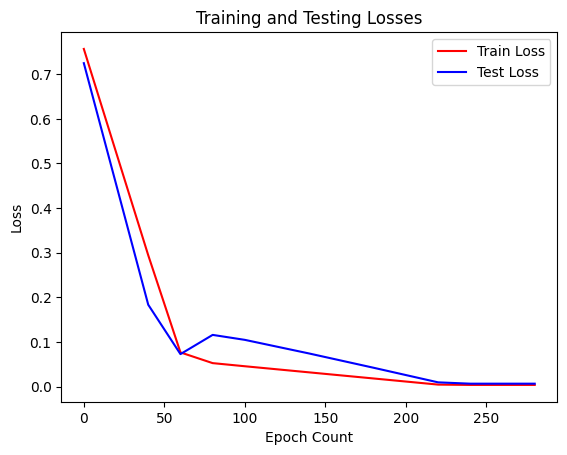

In [32]:
plt.plot(epoch_count, train_loss_values, c = 'r', label = "Train Loss")
plt.plot(epoch_count, test_loss_values, c = 'b', label = "Test Loss")
plt.title("Training and Testing Losses")
plt.xlabel("Epoch Count")
plt.ylabel("Loss")
plt.legend()



In [33]:
model_1.eval()

with torch.inference_mode():
  model_1.to(device)
  X_test = X_test.to(device)
  y_preds = model_1(X_test)


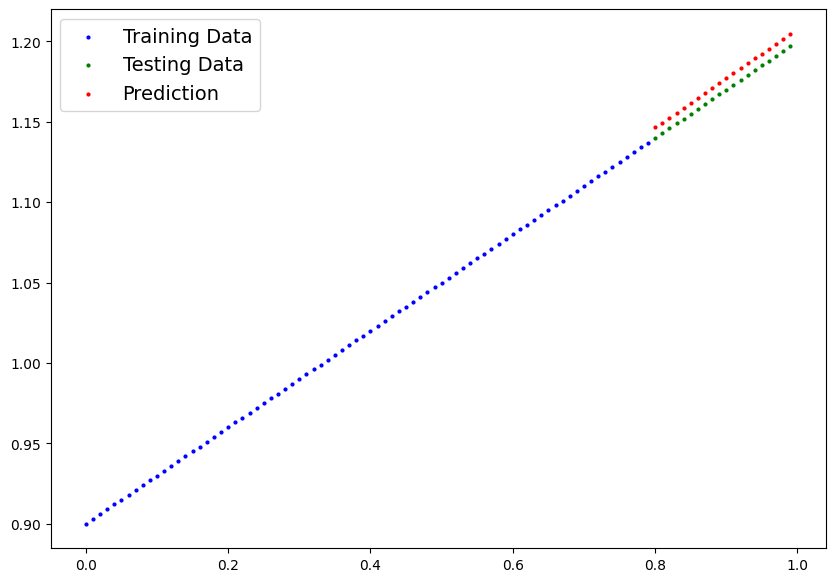

In [34]:
plot_predictions(predictions = y_preds)

In [20]:
from pathlib import Path
MODEL_PATH = Path("Models")
MODEL_NAME = "pytorch model 2"
MODEL_PATH.mkdir(parents = True, exist_ok = True)
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"saving model to {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(), f = MODEL_SAVE_PATH)



saving model to Models/pytorch model 2
